# Noise Studies 

## > Examine structure of dataset

In [1]:
import sys
import os
sys.path.append('/global/u2/c/caditi97/exatrkx-ctd2020')   #change accordingly
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from utils_robust import *

In [2]:
dir_path = "/global/cfs/projectdirs/atlas/xju/heptrkx/trackml_inputs/train_100_events"
event_path = os.path.join(dir_path, "event000001000")

In [3]:
hits, cells, particles, truth = trackml.dataset.load_event(event_path)

In [4]:
hits

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1
...,...,...,...,...,...,...,...
120934,120935,-763.862976,51.569401,2944.5,18,12,97
120935,120936,-808.705017,3.459260,2944.5,18,12,97
120936,120937,-982.935974,41.460899,2952.5,18,12,98
120937,120938,-942.698975,18.489100,2952.5,18,12,98


In [5]:
cells

,hit_id,ch0,ch1,value
0,1,209,617,0.013832
1,1,210,617,0.079887
2,1,209,618,0.211723
3,2,68,446,0.334087
4,3,58,954,0.034005
...,...,...,...,...
664991,120936,122,5,1.000000
664992,120936,123,5,1.000000
664993,120937,430,11,1.000000
664994,120938,260,7,1.000000


In [6]:
pt = np.sqrt(particles.px**2 + particles.py**2 + particles.pz**2)
particles = particles.assign(pt=pt)
particles

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pt
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8,0.385964
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11,2.271788
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0,1.124602
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12,1.227834
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824902,1,3,45.804420
...,...,...,...,...,...,...,...,...,...,...
12258,968305530860736513,-171.641006,302.667999,-1220.000000,-0.110735,-0.058300,-0.137469,1,0,0.185900
12259,968305530860740610,-171.641006,302.667999,-1220.000000,0.000191,-0.169234,-0.248553,1,4,0.300697
12260,968306149319245824,33.448101,20.703400,-102.514999,0.486316,0.268579,-1.227300,1,10,1.347183
12261,968306218038722560,33.448101,20.703400,-102.514999,0.082110,0.084122,-0.415145,-1,1,0.431467


In [7]:
truth

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.000000,0.000000
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.492200,0.000010
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.000000,0.000000
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.702320,0.000008
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.573180,0.000009
...,...,...,...,...,...,...,...,...,...
120934,120935,445864815605317632,-763.383972,51.544998,2944.5,-1.640200,0.208933,6.293810,0.000018
120935,120936,900720956266250240,-804.664978,3.186900,2944.5,-0.315684,-0.094259,1.328200,0.000007
120936,120937,238705348779704320,-986.989014,41.731300,2952.5,-0.212508,0.095667,0.731932,0.000009
120937,120938,373800349619716096,-947.005005,18.764999,2952.5,-0.165762,-0.103945,0.800783,0.000007


- Scatterplot of all hits in the detector

Text(0.5, 1.0, 'All Hits')

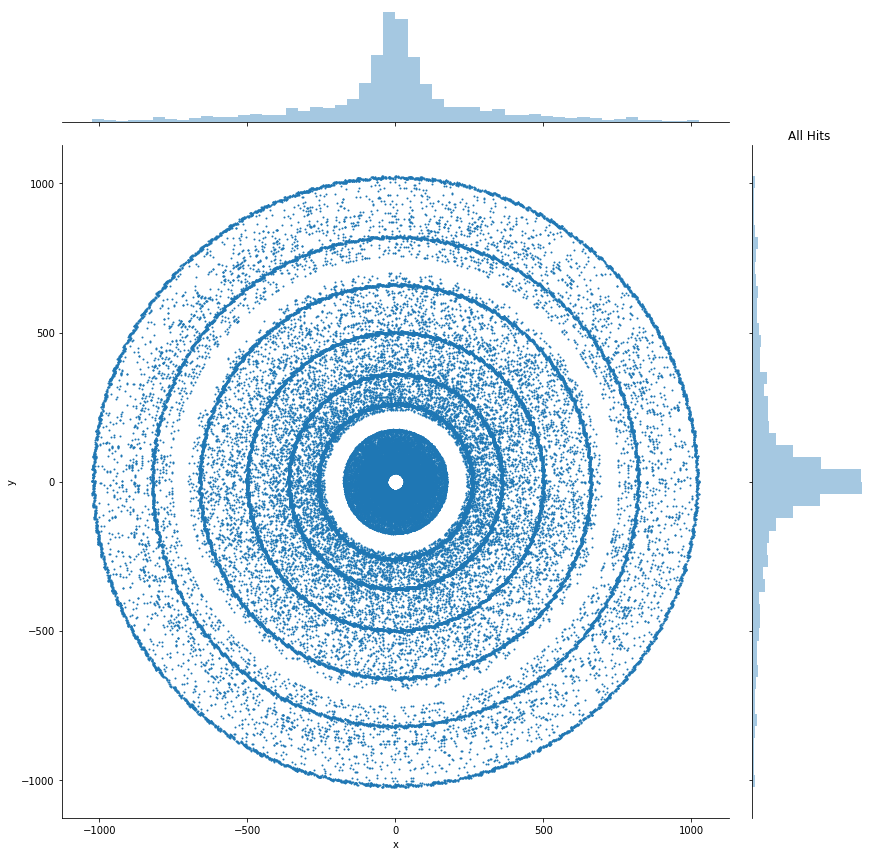

In [8]:
g1 = sns.jointplot(hits.x, hits.y, s=1, height=12)
plt.title('All Hits')

- All hits in detector according to volume

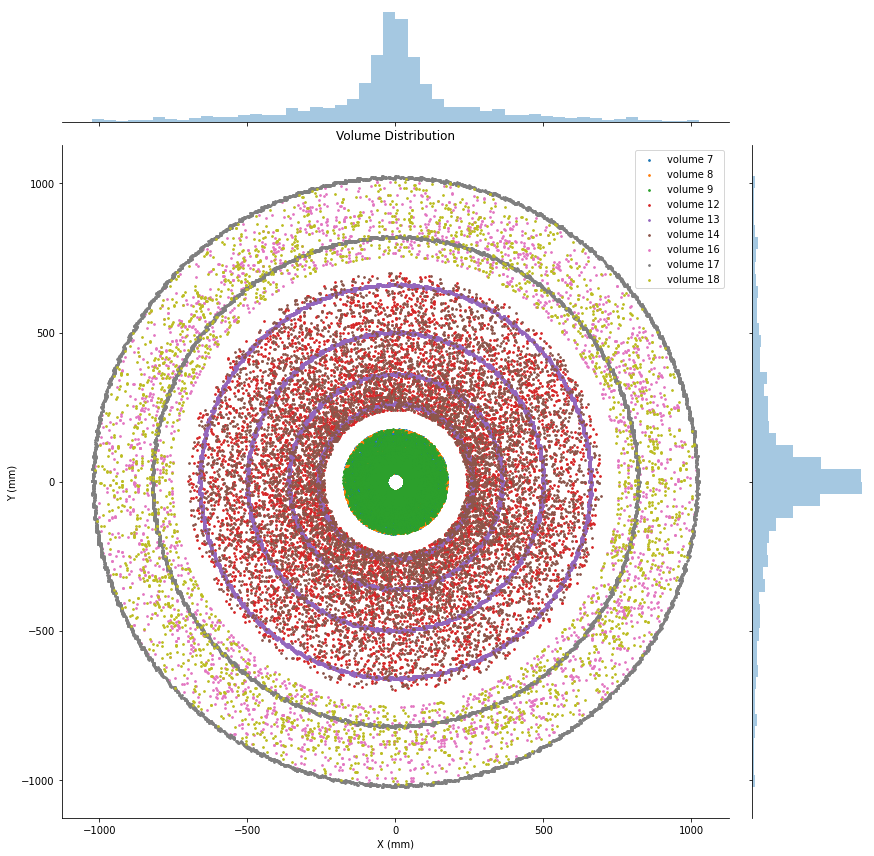

In [9]:
g2 = sns.jointplot(hits.x, hits.y, s=1, height=12)
g2.ax_joint.cla()
plt.sca(g2.ax_joint)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.x, v.y, s=3, label='volume {}'.format(volume))
    
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.title('Volume Distribution')
plt.show()

## > Add Noise to dataset
- In order to see how our model is effected by noise we add a certain fraction of randomly chosen noise hits to our dataset. 
- Noise is defined as having particle id = 0.

In [10]:
# parameters = hits, cells, truth from dataset and percentage of noise to add
# returns = hits,cells,truth files with added noise
def remove_all_noise(hits, cells, truth, perc = 0.0):
    print("adding " + str(perc) + " % noise")
    if perc >= 1.0:
        return hits,cells,truth
    
    unique_ids = truth.particle_id.unique()
    track_ids_to_keep = unique_ids[np.where(unique_ids != 0)]
    noise_hits = unique_ids[np.where(unique_ids == 0)]
    where_to_keep = truth['particle_id'].isin(track_ids_to_keep)
    hits_reduced  = hits[where_to_keep]
    hit_ids_red = hits_reduced.hit_id.values
    noise_ids = hits[~where_to_keep].hit_id.values
    
    if perc <= 0.0:
        noise_ids = []
    else:
        num_rows = int(perc * noise_ids.shape[0])
        noise_ids = np.random.permutation(noise_ids)[:num_rows]

    #add noise
    hits_ids_noise = np.concatenate([hit_ids_red, noise_ids])
    
    noise_hits = hits[hits['hit_id'].isin(hits_ids_noise)]
    noise_truth = truth[truth['hit_id'].isin(hits_ids_noise)]
    noise_cells = cells[cells['hit_id'].isin(noise_truth.hit_id.values)]
    
    return noise_hits, noise_cells, noise_truth

- Plot Noise Distribution with respect to non-noise hits

adding 0.0 % noise
adding 0.1 % noise
adding 0.2 % noise
adding 0.30000000000000004 % noise
adding 0.4 % noise
adding 0.5 % noise
adding 0.6000000000000001 % noise
adding 0.7000000000000001 % noise
adding 0.8 % noise
adding 0.9 % noise
adding 1.0 % noise


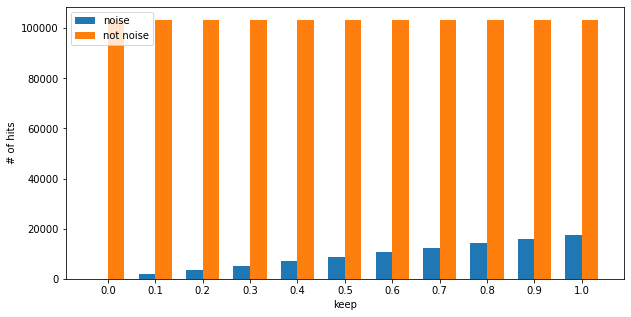

In [11]:
keeps = np.arange(0.0, 1.1, 0.1)
noise_hits = []
not_noise_hits = []

for i in keeps:
    _, _, reduced_truth = remove_all_noise(hits, cells, truth, i)
    n_noise = sum(reduced_truth['particle_id'] == 0)
    noise_hits.append(n_noise)
    not_noise_hits.append(len(reduced_truth) - n_noise)

x = np.arange(len(keeps))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, noise_hits, width, label='noise')
rects2 = ax.bar(x + width/2, not_noise_hits, width, label='not noise')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of hits')
ax.set_xlabel('keep')
ax.set_xticks(x)
labels = ['%.1f' % (i,) for i in keeps]
ax.set_xticklabels(labels)
ax.legend()

- Noise Hit Distribution comparison

adding 0.2 % noise
----0.2 Noise----
hits
(106831, 7)
truth
(106831, 9)
Not Noise Hits = 103305
Noise Hits = 3526


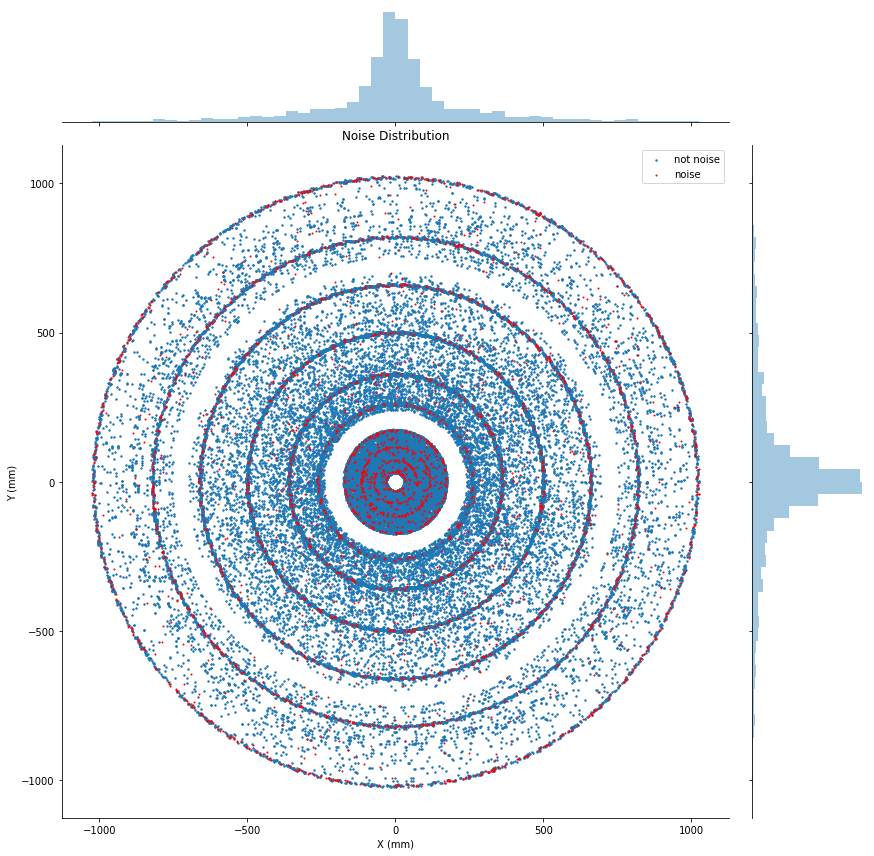

In [15]:
hits_n2, _, truth_n2 = remove_all_noise(hits, cells, truth, perc = 0.2)
plot_noise(hits_n2,truth_n2,0.2)

adding 1.0 % noise
----1.0 Noise----
hits
(120939, 7)
truth
(120939, 9)
Not Noise Hits = 103305
Noise Hits = 17634


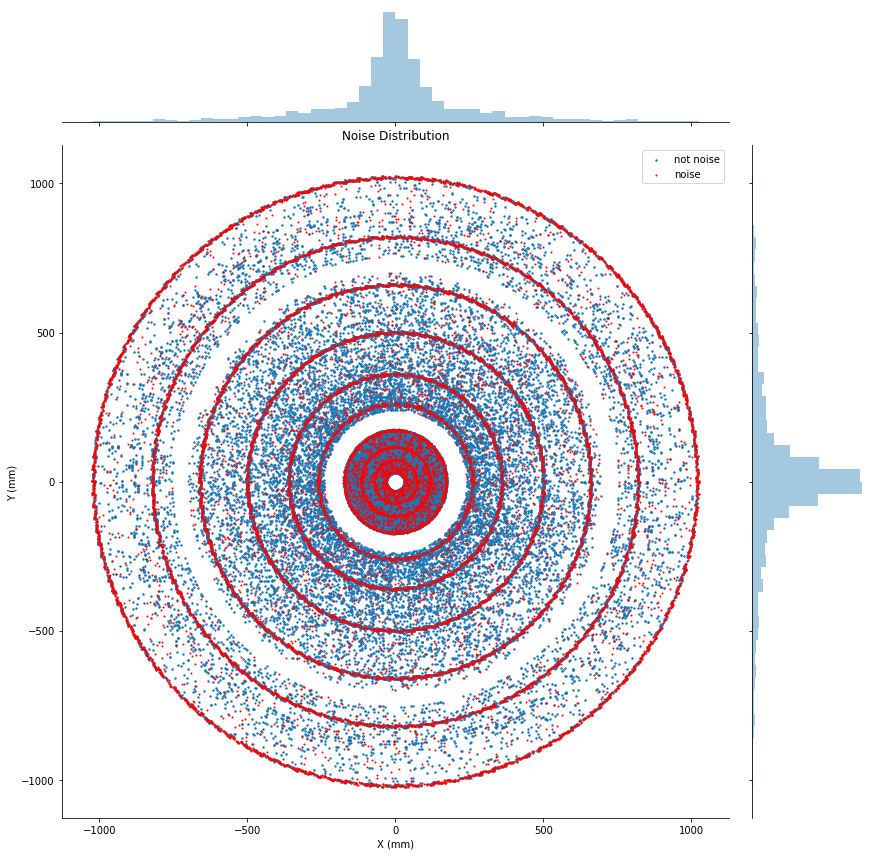

In [16]:
hits_n10, _, truth_n10 = remove_all_noise(hits, cells, truth, perc = 1.0)
plot_noise(hits_n10,truth_n10,1.0)